<table align="center" width="100%">
    <tr>
        <td style="background-color: #000000;">
            <div align="center" class="yulu-title" style="font-family: 'Bebas Neue', sans-serif; font-size: 42px; color: #e30b14;">
                <b><h1>WALMART</h1></b>
            </div>
        </td>
    </tr>
</table>

<!-- Link to the Bebas Neue font from Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Bebas+Neue&display=swap" rel="stylesheet">


## Table of Contents

1. **[Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset](#imp)**
    
2. **[Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)](#det)**

3. **[Data exploration:](#data_expl)**
    - 3.1 **[Track the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results](#track)**
    - 3.2 **[Inference after computing the average female and male expenses](#avg_exp)**
    - 3.3 **[Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers, calculate the interval within which the average spending of 50 million male and female customers may lie](#)**
    
4. **[Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers](#vis_analysis)**
    - 4.1 **[The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations](#cont_var)**
    
5. **[5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?](#conclusion)**

6. **[6. Perform the same activity for Married vs Unmarried and Age](#insights)**
    - 6.1 **[For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years](#roa)**
    
7. **[7. Give recommendations and action items to Walmart](#bi)**

=============================================================================================================
# 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset <a id='imp'></a>
=============================================================================================================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### The problem statement for the Walmart project, can be defined as follows:

"The goal of the Walmart project is to analyze customer spending patterns during Black Friday sales and make informed decisions based on the data. By examining the dataset, including gender, marital status, and age, the project aims to understand if there are differences in spending between various customer segments. Additionally, using statistical methods such as bootstrapping, the project seeks to estimate population parameters, such as average spending per transaction, and determine confidence intervals for these estimates. The insights gained from the analysis will help Walmart make strategic improvements and cater to the needs of its customers more effectively."

## Some potential analyzing metrics for this project could include:

1. __Average Spending__: Calculating the average purchase amount per transaction for different customer segments such as gender, marital status, and age groups. This metric provides insights into the general spending behavior and patterns of customers.

2. __Comparison of Spending__: Comparing the average spending between different customer segments, such as male and female customers, married and unmarried customers, or different age groups. This analysis helps identify any significant differences in spending behavior among these segments.

3. __Confidence Intervals__: Estimating confidence intervals for average spending to determine the range within which the true population average spending is likely to lie. This metric helps in understanding the uncertainty associated with the average spending estimates and enables more robust decision-making.

4. __Distribution Analysis__: Analyzing the distribution of spending amounts using methods like histograms, density plots, or box plots. This analysis provides insights into the spread, skewness, or any outliers in the spending data.

5. __Hypothesis Testing__: Conducting statistical hypothesis tests, such as t-tests or ANOVA, to assess whether there are significant differences in spending between different customer segments. This analysis helps identify if the observed differences in spending are statistically significant or due to random chance.

6. __Visualization__: Creating visual representations, such as bar charts, pie charts, or scatter plots, to present the spending patterns and comparisons between different customer segments. Visualizations aid in conveying information effectively and identifying any trends or patterns in the data.

These analyzing metrics provide a framework for understanding customer spending patterns, identifying differences between customer segments, and making data-driven decisions to optimize Walmart's strategies during the Black Friday sales and beyond.

In [2]:
df = pd.read_csv("walmart.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


=============================================================================================================
# 2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.) <a id='det'></a>
=============================================================================================================

In [29]:
# Convert columns to category data type
columns_to_convert = ["Gender", "Occupation", "Product_Category", "Marital_Status"]
df[columns_to_convert] = df[columns_to_convert].astype("category")
# datatype of a few column having categorical attributes have been changed so as to have 
# more efficient storage and potential performance benefits when working with this categorical data.

In [8]:
# Check for null values
null_counts = df.isnull().sum()
print("Null Value Counts:")
print(null_counts)
# Here we observe that the given dataset doesn't have any null values.

Null Value Counts:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


## In the above line of code, we observe that the given dataset doesn't have any null values.

In [30]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

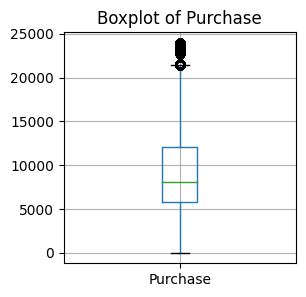

In [11]:
# Detect outliers using boxplot
plt.figure(figsize=(3,3))
df.boxplot(column=["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

C:\Users\nidhi\AppData\Local\Temp\ipykernel_11668\409686796.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=True)


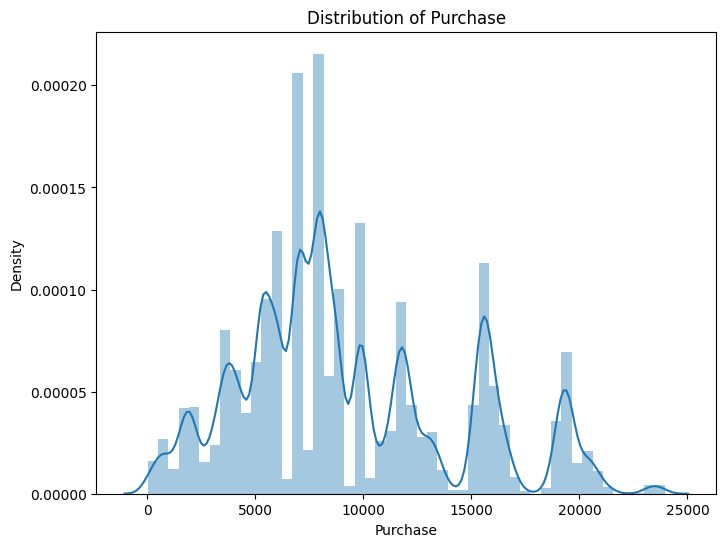

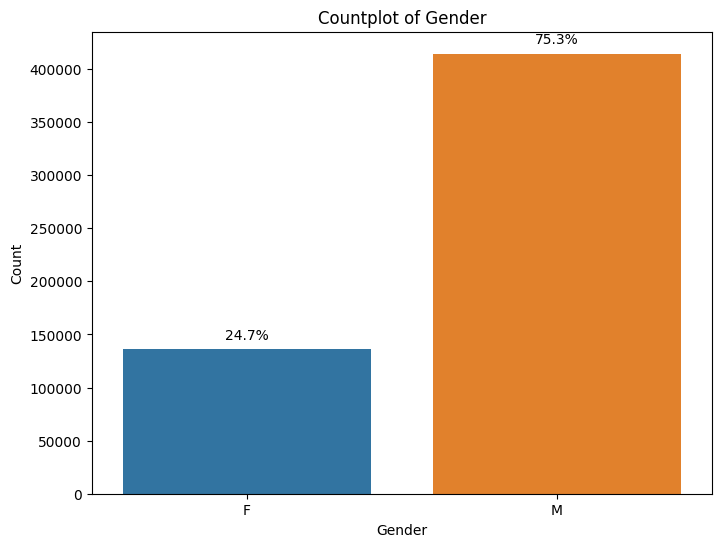

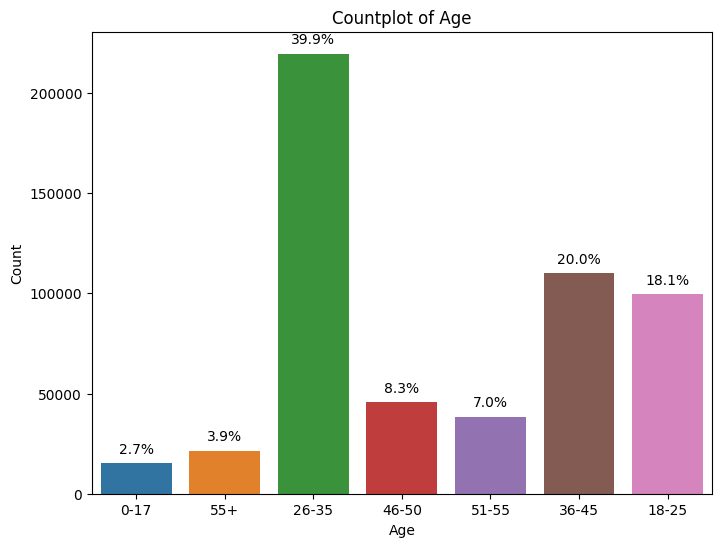

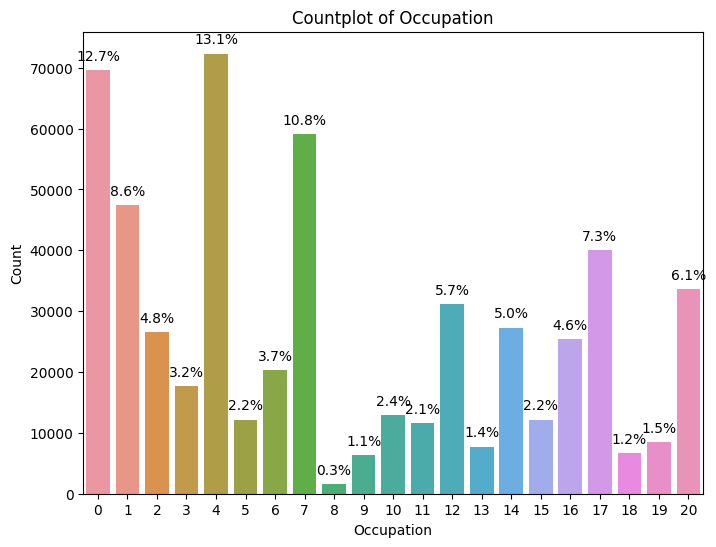

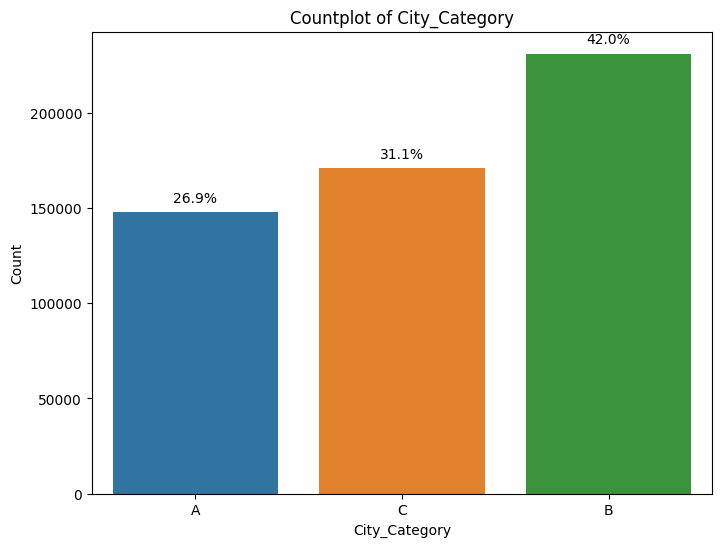

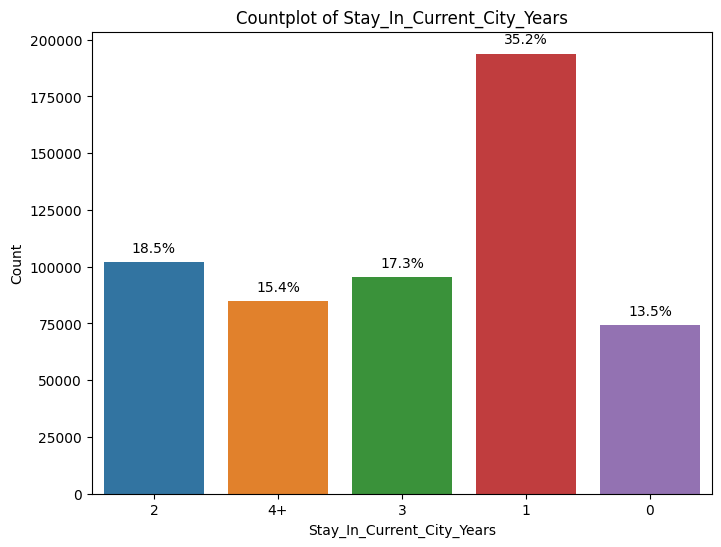

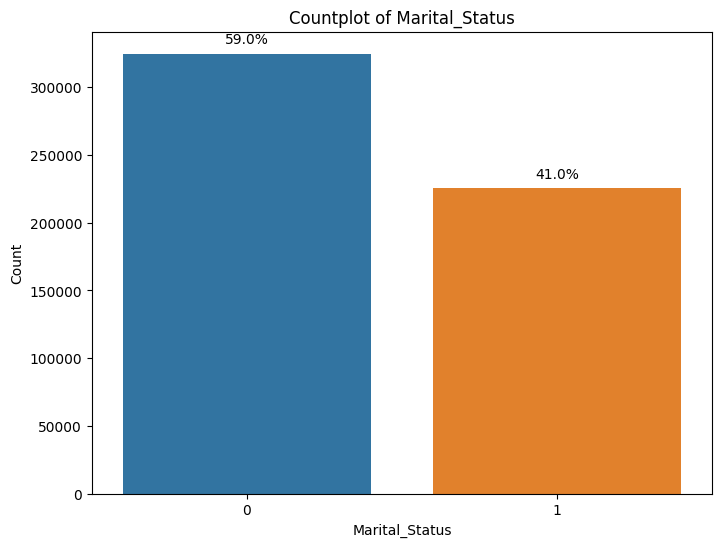

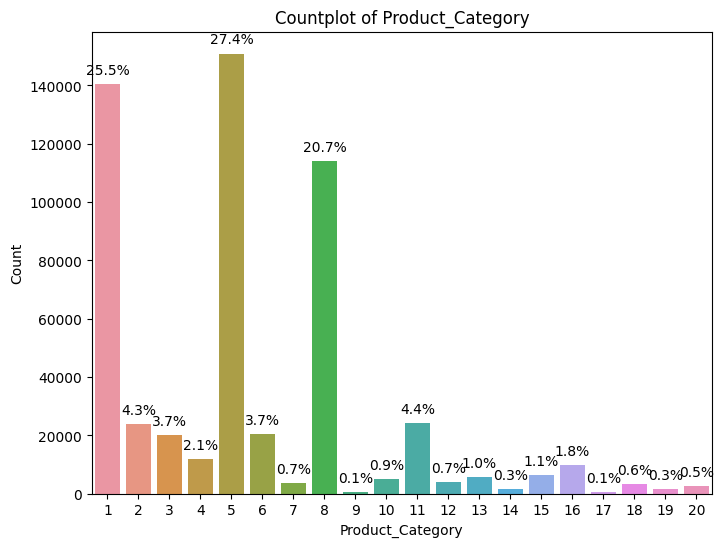

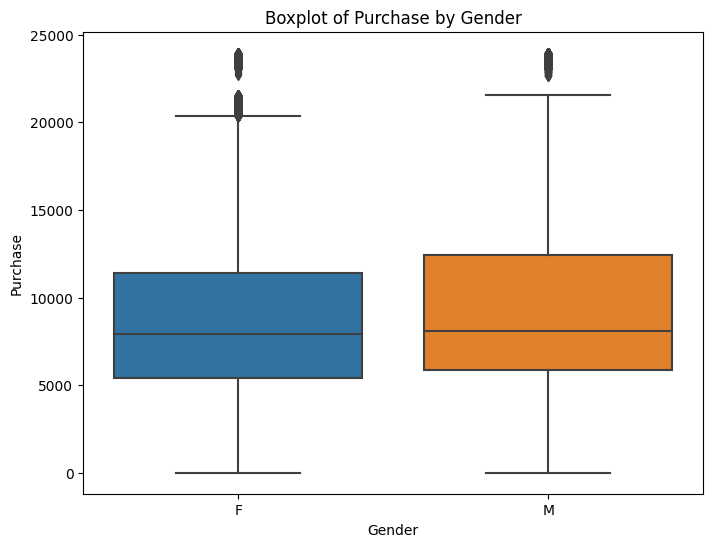

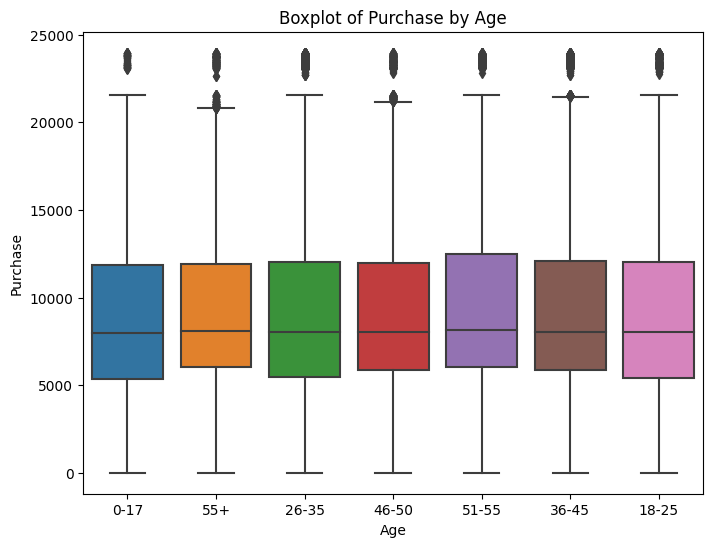

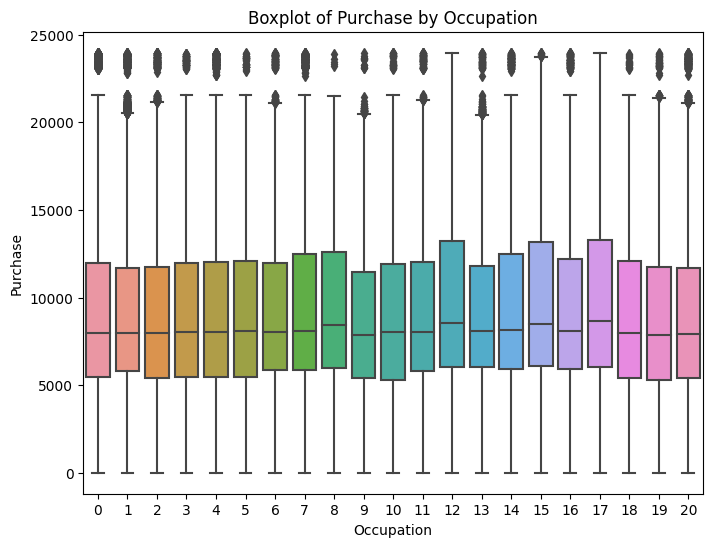

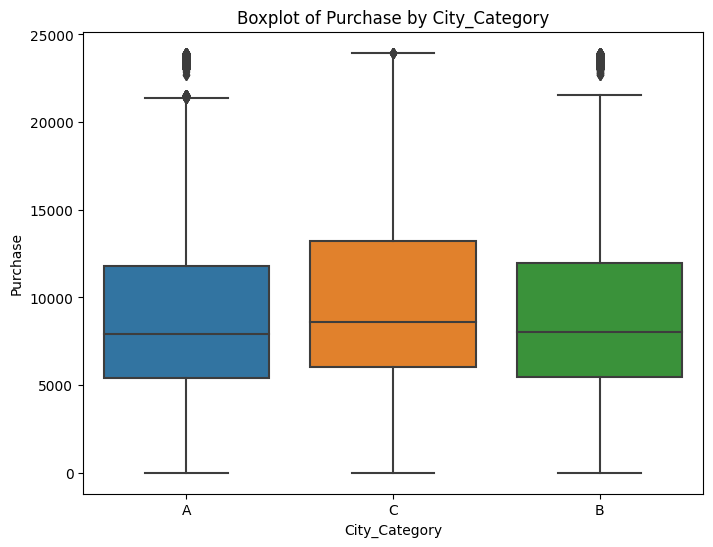

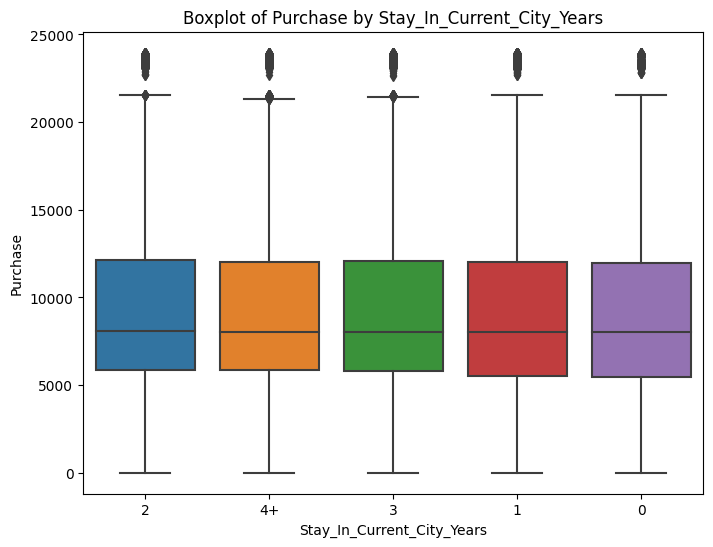

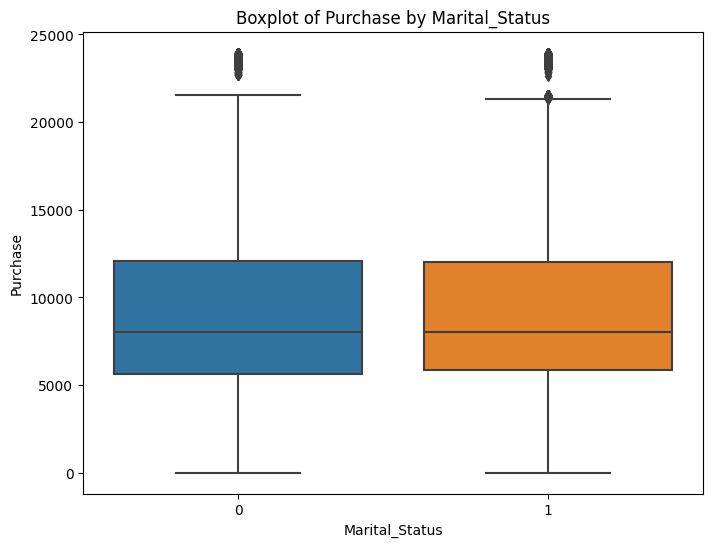

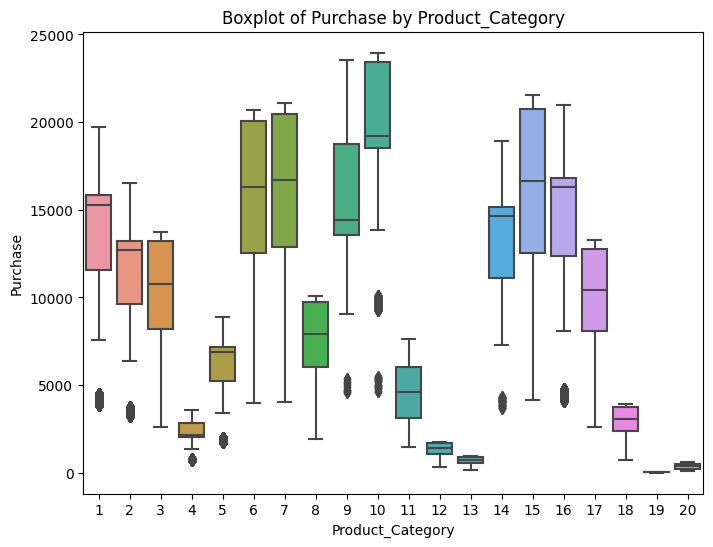

In [66]:
# Continuous Variables
continuous_vars = ["Purchase"]

# Categorical Variables
categorical_vars = ["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", 
                    "Product_Category"]

# Plotting Distplot and Histogram for Continuous Variables
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.show()

# Plotting Countplot for Categorical Variables
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=var, data=df)
    plt.title(f"Countplot of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    total = len(df[var])
    # Add percentage values above each bar
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')
    plt.show()

# Plotting Boxplot for Categorical Variables
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x=var, y="Purchase", data=df)
    plt.title(f"Boxplot of Purchase by {var}")
    plt.xlabel(var)
    plt.ylabel("Purchase")
    # Add numerical values above each boxplot
    boxplot_stats = df.groupby(var)["Purchase"].describe()
    for i, box in enumerate(ax.artists):
        stats = boxplot_stats.loc[box.get_label()]
        ax.text(i, stats['75%'], f"Q3: {int(stats['75%'])}", ha='center', va='bottom')
        ax.text(i, stats['25%'], f"Q1: {int(stats['25%'])}", ha='center', va='top')
        ax.text(i, stats['max'], f"Max: {int(stats['max'])}", ha='center', va='bottom')
        ax.text(i, stats['min'], f"Min: {int(stats['min'])}", ha='center', va='top')
        ax.text(i, stats['median'], f"Median: {int(stats['50%'])}", ha='center', va='bottom')
    plt.show()


In [69]:
# Categorical Variables
categorical_vars = ["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", 
                    "Marital_Status", "Product_Category"]

# Groupby and Aggregation for Categorical Variables
for var in categorical_vars:
    var_stats = df.groupby(var)["Purchase"].describe()
    var_stats = var_stats[["count", "mean", "std", "min", "max"]]
    var_stats["percent_of_total"] = var_stats["count"] / df.shape[0] * 100
    print(f"Summary statistics of Purchase grouped by {var}:")
    print(var_stats)
    print()


Summary statistics of Purchase grouped by Gender:
           count         mean          std   min      max  percent_of_total
Gender                                                                     
F       135809.0  8734.565765  4767.233289  12.0  23959.0         24.689493
M       414259.0  9437.526040  5092.186210  12.0  23961.0         75.310507

Summary statistics of Purchase grouped by Age:
          count         mean          std   min      max  percent_of_total
Age                                                                       
0-17    15102.0  8933.464640  5111.114046  12.0  23955.0          2.745479
18-25   99660.0  9169.663606  5034.321997  12.0  23958.0         18.117760
26-35  219587.0  9252.690633  5010.527303  12.0  23961.0         39.919974
36-45  110013.0  9331.350695  5022.923879  12.0  23960.0         19.999891
46-50   45701.0  9208.625697  4967.216367  12.0  23960.0          8.308246
51-55   38501.0  9534.808031  5087.368080  12.0  23960.0          6.99931

Based on the analysis of the provided data, following insights can be drawn:

1. Range of Attributes:
   - Gender: The dataset includes both male and female customers, with approximately 75% being male and 25% being female.
   - Age: The age of customers ranges from 0 to 55+ years. The majority of customers fall within the age range of 26-35, followed by 36-45 and 18-25.
   - Occupation: The dataset covers various occupations, ranging from 0 to 20. Occupations 0, 4, and 7 have the highest representation in the dataset.
   - City_Category: Customers are distributed across three city categories: A, B, and C. Category B has the highest number of customers, followed by categories C and A.
   - Stay_In_Current_City_Years: Customers have varying durations of stay in their current cities. The majority of customers have been staying for 1 year, followed by 2, 3, 0 (recently moved), and 4+ years.
   - Marital_Status: The dataset includes both married and unmarried customers, with approximately 59% being unmarried and 41% being married.
   - Product_Category: The dataset covers a wide range of product categories, numbered from 1 to 20. Categories 1, 5, and 8 have the highest representation in the dataset.

2. Distribution of Variables and Relationships:
   - Gender: The distribution of purchases between males and females shows that, on average, males have a slightly higher mean purchase value compared to females.
   - Age: The distribution of purchases across different age groups shows that customers in the age range of 51-55 have the highest mean purchase value, followed by customers in the 55+ age group. Customers in the 0-17 age group have the lowest mean purchase value.
   - Occupation: Different occupations show variations in their mean purchase values. Occupations 8 and 12 have the highest mean purchase values, while occupation 9 has the lowest mean purchase value.
   - City_Category: Customers from city category C tend to have a higher mean purchase value compared to categories A and B.
   - Stay_In_Current_City_Years: The duration of stay in the current city does not show a significant impact on the mean purchase value, as the values remain relatively consistent across different durations.
   - Marital_Status: The distribution of purchases between married and unmarried customers does not show a significant difference in the mean purchase value.
   - Product_Category: Different product categories exhibit varying mean purchase values. Categories 9, 10, 7, 6, and 15 have relatively higher mean purchase values, while categories 19, 13, 18, 12, and 17 have lower mean purchase values.

These insights provide an overview of the data and can help Walmart understand the customer segments that contribute to higher purchase values. However, further analysis and modeling may be required to uncover deeper insights and identify more specific patterns and relationships in the data.

In [70]:
# Check the difference between mean and median
purchase_mean = df["Purchase"].mean()
purchase_median = df["Purchase"].median()
difference = abs(purchase_mean - purchase_median)
print("The mean of overll purchases is: ",round(purchase_mean,2))
print("The median of overll purchases is: ",purchase_median)
print("Difference between mean and median of Purchase:", round(difference,2))
print("The mean is ",round((purchase_mean-purchase_median)*100/purchase_mean,2),"percent higher than the median")
# Here we observe that the mean is 13% bigger than the median, 
# which indiactes that we must have some high spending outliers in the particular dataset.
# This could indicate that a portion of customers made large purchases, 
# potentially taking advantage of Black Friday discounts or buying high-value items.

The mean of overll purchases is:  9263.97
The median of overll purchases is:  8047.0
Difference between mean and median of Purchase: 1216.97
The mean is  13.14 percent higher than the median


### Here we observe that the mean is 13% bigger than the median, which indiactes that we must have some high spending outliers in this particular dataset.This could indicate that a portion of customers made large purchases, potentially taking advantage of Black Friday discounts or buying high-value items.

In [71]:
# Checking the difference between mean and median in case of male customers
purchase_mean_male = round(df[df["Gender"] == "M"]["Purchase"].mean(),2)
purchase_median_male = df[df["Gender"] == "M"]["Purchase"].median()
difference_male = round(abs(purchase_mean_male - purchase_median_male),2)
print("The mean of male purchases is: ",purchase_mean_male)
print("The median of male purchases is: ",purchase_median_male)
print("Difference between mean and median of male Purchase:", difference_male)
print("The mean is ",round((purchase_mean_male-purchase_median_male)*100/purchase_mean_male,2),"percent higher than the median")


The mean of male purchases is:  9437.53
The median of male purchases is:  8098.0
Difference between mean and median of male Purchase: 1339.53
The mean is  14.19 percent higher than the median


## So, the male mean-median % difference is similar to that of the overall purchases. From a retail business perspective, this may suggest that certain male customers are more inclined to make larger purchases on Black Friday, possibly driven by specific product preferences or shopping behaviors.


In [72]:
# Checking the difference between mean and median in case of female customers
purchase_mean_female = round(df[df["Gender"] == "F"]["Purchase"].mean(),2)
purchase_median_female = df[df["Gender"] == "F"]["Purchase"].median()
difference_female = round(abs(purchase_mean_male - purchase_median_male),2)
print("The mean of female purchases is: ",purchase_mean_female)
print("The median of female purchases is: ",purchase_median_female)
print("Difference between mean and median of female Purchase:", difference_female)
print("The mean is ",round((purchase_mean_female-purchase_median_female)*100/purchase_mean_female,2),"percent higher than the median")


The mean of female purchases is:  8734.57
The median of female purchases is:  7914.0
Difference between mean and median of female Purchase: 1339.53
The mean is  9.39 percent higher than the median


### The mean of female purchases is 9.39% higher than the median. Interestingly, the mean-median difference for female purchases is lower compared to the overall and male purchases. This suggests that there are fewer high spending female outliers on Black Friday. Retailers could interpret this finding as an indication that female customers, on average, exhibit more consistent spending patterns and may not engage in as many large-scale purchases on this particular shopping day. This insight could help Walmart tailor their offers and promotions to better suit the spending habits of female customers, focusing on value, convenience, and targeted product categories.

### Overall, analyzing the mean-median differences provides valuable insights into the spending behavior of different customer segments. By understanding these differences, Walmart can design targeted marketing strategies, personalized offers, and product assortments to cater to the distinct preferences and needs of various customer segments. This approach can lead to enhanced customer satisfaction, increased sales, and improved customer retention.

In [6]:
df["Purchase"].describe().round(2)
# Here, we can observe a lot of things. One of them being the range of values purchase takes.
# Purchase --> (12,23961)

count    550068.00
mean       9263.97
std        5023.07
min          12.00
25%        5823.00
50%        8047.00
75%       12054.00
max       23961.00
Name: Purchase, dtype: float64

In [19]:
df2 = (df.groupby("Gender")["User_ID"]
.count()
.reset_index()
.rename(columns = {"User_ID":"Count"})
)
df2

,Gender,Count
0,F,135809
1,M,414259


In [20]:
df3 = (df.groupby("Gender")["Purchase"]
.sum()
.reset_index()
.rename(columns = {"User_ID":"Total_Purchase"})
)
df3

,Gender,Purchase
0,F,1186232642
1,M,3909580100


### As we can see here, the females spent around 1.18 bn dollars while, on the same black friday, the males spent 3.9 bn dollars.
### Now, we know that the population mean for Male customers is 50mn while that of female customers is 50mn as well. So, treating this black friday as a sample of the overall spending behaviour of the customers, we can take 1.18 bn as the sample mean for female spenders and 3.9 bn as that for their male counterparts.

In [46]:
df6 = (df.groupby("Age")["User_ID"]
.count()
.reset_index()
.rename(columns = {"User_ID":"Count"})
)
df6

,Age,Count
0,0-17,15102
1,18-25,99660
2,26-35,219587
3,36-45,110013
4,46-50,45701
5,51-55,38501
6,55+,21504


In [9]:
purchase_range = (np.min(df["Purchase"]), np.max(df["Purchase"]))
purchase_range

(12, 23961)

Results:
1.(i) Are women spending more money per transaction than men?
   No, women are not spending more money per transaction than men.


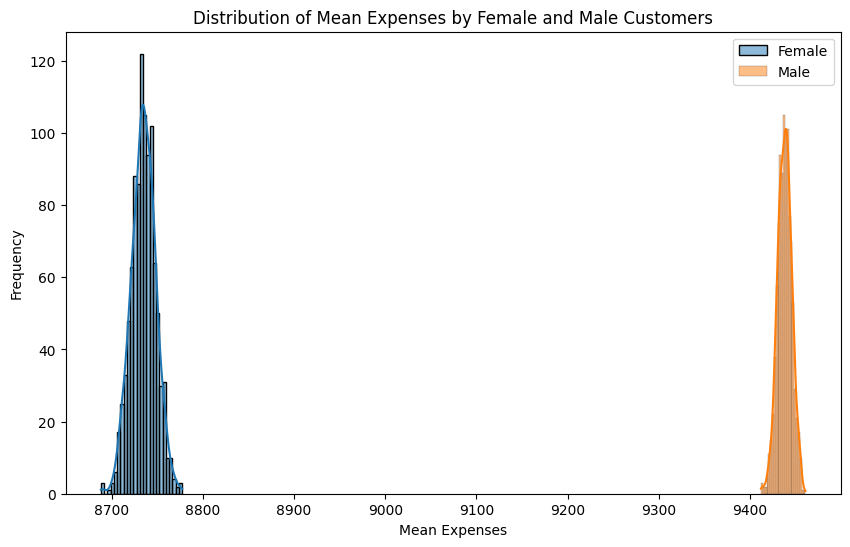

1.(ii) Confidence Intervals:
   Female Customers:  [8708.95449031 8760.45516258]
   Male Customers:  [9422.61592735 9453.06894624]
1.(iii) Are confidence intervals of average male and female spending overlapping?
   No, the confidence intervals of average male and female spending do not overlap.
2.(i) Are married customers spending more money per transaction than unmarried customers?
   No, married customers are not spending more money per transaction than unmarried customers.


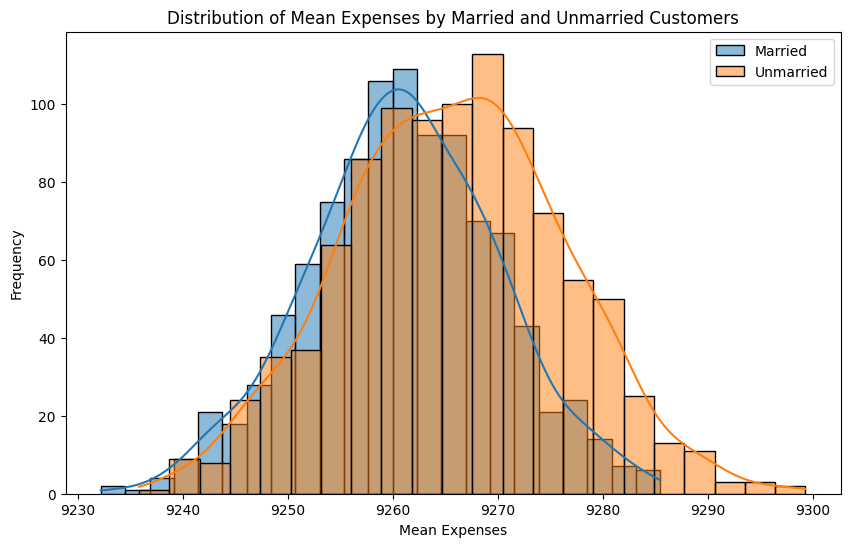

2.(ii) Confidence Intervals:
   Married Customers:  [9242.86355907 9279.11584881]
   Unmarried Customers:  [9245.14125465 9286.76880838]
2.(iii) Are confidence intervals of average married and unmarried customers spending overlapping?
   Yes, the confidence intervals of average married and unmarried customers spending overlap.
3.(i) Results for Different Age Groups:
   Confidence Interval: 
   Age Group (0-17):  [8854.69860449 9015.41389386]
   Age Group (17-25):  [9135.70551224 9199.23666993]
   Age Group (26-35):  [9230.53878952 9274.21350672]
   Age Group (36-45):  [9303.77401512 9361.11714207]
   Age Group (46-50):  [9161.14496127 9256.87812247]
   Age Group (51-55):  [9481.76767227 9584.36707423]
   Age Group (55+):  [9267.40035691 9401.18092448]


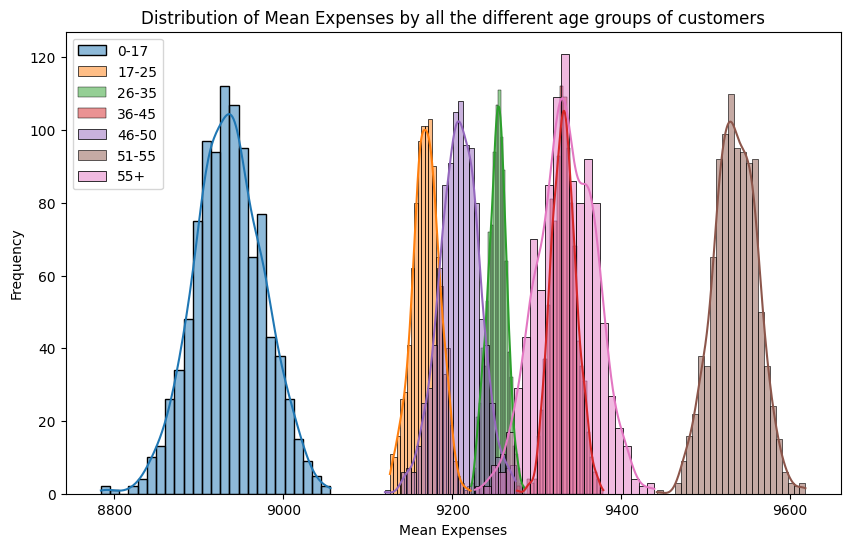

In [9]:
# Set the random seed for reproducibility
np.random.seed(42)

# Set the number of bootstrap iterations
n_iterations = 1000

# Initialize empty arrays to store bootstrap statistics
bootstrap_female_mean = np.zeros(n_iterations)
bootstrap_male_mean = np.zeros(n_iterations)
bootstrap_married_mean = np.zeros(n_iterations)
bootstrap_unmarried_mean = np.zeros(n_iterations)
bootstrap_age1_mean = np.zeros(n_iterations)
bootstrap_age2_mean = np.zeros(n_iterations)
bootstrap_age3_mean = np.zeros(n_iterations)
bootstrap_age4_mean = np.zeros(n_iterations)
bootstrap_age5_mean = np.zeros(n_iterations)
bootstrap_age6_mean = np.zeros(n_iterations)
bootstrap_age7_mean = np.zeros(n_iterations)

# Perform bootstrap resampling
for i in range(n_iterations):
    # Resample female and male customers with replacement
    bootstrap_female_sample = df[df["Gender"] == "F"]["Purchase"].sample(n=135809, replace=True)
    bootstrap_male_sample = df[df["Gender"] == "M"]["Purchase"].sample(n=414259, replace=True)
    
    # Resample married and unmarried customers with replacement
    bootstrap_married_sample = df[df["Marital_Status"] == 1]["Purchase"].sample(n=324731, replace=True)  
    bootstrap_unmarried_sample = df[df["Marital_Status"] == 0]["Purchase"].sample(n=225337, replace=True)
    
    # Resample customers by age group with replacement
    bootstrap_age_sample_1 = df[df["Age"] == "0-17"]["Purchase"].sample(n=15102, replace=True)
    bootstrap_age_sample_2 = df[df["Age"] == "18-25"]["Purchase"].sample(n=99660, replace=True)
    bootstrap_age_sample_3 = df[df["Age"] == "26-35"]["Purchase"].sample(n=219587, replace=True)
    bootstrap_age_sample_4 = df[df["Age"] == "36-45"]["Purchase"].sample(n=110013, replace=True)
    bootstrap_age_sample_5 = df[df["Age"] == "46-50"]["Purchase"].sample(n=45701, replace=True)
    bootstrap_age_sample_6 = df[df["Age"] == "51-55"]["Purchase"].sample(n=38501, replace=True)
    bootstrap_age_sample_7 = df[df["Age"] == "55+"]["Purchase"].sample(n=21504, replace=True)
    
    # Calculate the mean for each bootstrap sample
    bootstrap_female_mean[i] = bootstrap_female_sample.mean()
    bootstrap_male_mean[i] = bootstrap_male_sample.mean()
    bootstrap_married_mean[i] = bootstrap_married_sample.mean()
    bootstrap_unmarried_mean[i] = bootstrap_unmarried_sample.mean()
    bootstrap_age1_mean[i] = bootstrap_age_sample_1.mean()
    bootstrap_age2_mean[i] = bootstrap_age_sample_2.mean()
    bootstrap_age3_mean[i] = bootstrap_age_sample_3.mean()
    bootstrap_age4_mean[i] = bootstrap_age_sample_4.mean()
    bootstrap_age5_mean[i] = bootstrap_age_sample_5.mean()
    bootstrap_age6_mean[i] = bootstrap_age_sample_6.mean()
    bootstrap_age7_mean[i] = bootstrap_age_sample_7.mean()
    
# Calculate the confidence intervals for average male and female spending
confidence_interval_female = np.percentile(bootstrap_female_mean, [2.5, 97.5])
confidence_interval_male = np.percentile(bootstrap_male_mean, [2.5, 97.5])

# Calculate the confidence intervals for average married and unmarried spending
confidence_interval_married = np.percentile(bootstrap_married_mean, [2.5, 97.5])
confidence_interval_unmarried = np.percentile(bootstrap_unmarried_mean, [2.5, 97.5])

# Calculate the confidence intervals for average spending in different age groups
confidence_interval_age1 = np.percentile(bootstrap_age1_mean, [2.5, 97.5])
confidence_interval_age2 = np.percentile(bootstrap_age2_mean, [2.5, 97.5])
confidence_interval_age3 = np.percentile(bootstrap_age3_mean, [2.5, 97.5])
confidence_interval_age4 = np.percentile(bootstrap_age4_mean, [2.5, 97.5])
confidence_interval_age5 = np.percentile(bootstrap_age5_mean, [2.5, 97.5])
confidence_interval_age6 = np.percentile(bootstrap_age6_mean, [2.5, 97.5])
confidence_interval_age7 = np.percentile(bootstrap_age7_mean, [2.5, 97.5])

# Print the results
print("Results:")
print("1.(i) Are women spending more money per transaction than men?")
if confidence_interval_female[1] > confidence_interval_male[1]:
    print("   Yes, women are spending more money per transaction than men.")
else:
    print("   No, women are not spending more money per transaction than men.")

# Plot the distribution of bootstrap means for female and male customers
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_female_mean, kde=True, label="Female")
sns.histplot(bootstrap_male_mean, kde=True, label="Male")
plt.title("Distribution of Mean Expenses by Female and Male Customers")
plt.xlabel("Mean Expenses")
plt.ylabel("Frequency")
plt.legend()
plt.show()
    
print("1.(ii) Confidence Intervals:")
print("   Female Customers: ", confidence_interval_female)
print("   Male Customers: ", confidence_interval_male)

print("1.(iii) Are confidence intervals of average male and female spending overlapping?")
if confidence_interval_female[1] >= confidence_interval_male[0] and confidence_interval_female[0] <= confidence_interval_male[1]:
    print("   Yes, the confidence intervals of average male and female spending overlap.")
else:
    print("   No, the confidence intervals of average male and female spending do not overlap.")

print("2.(i) Are married customers spending more money per transaction than unmarried customers?")
if confidence_interval_married[1] > confidence_interval_unmarried[1]:
    print("   Yes, married customers are spending more money per transaction than unmarried customers.")
else:
    print("   No, married customers are not spending more money per transaction than unmarried customers.")

# Plot the distribution of bootstrap means for married and unmarried customers
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_married_mean, kde=True, label="Married")
sns.histplot(bootstrap_unmarried_mean, kde=True, label="Unmarried")
plt.title("Distribution of Mean Expenses by Married and Unmarried Customers")
plt.xlabel("Mean Expenses")
plt.ylabel("Frequency")
plt.legend()
plt.show()    

print("2.(ii) Confidence Intervals:")
print("   Married Customers: ", confidence_interval_married)
print("   Unmarried Customers: ", confidence_interval_unmarried)

print("2.(iii) Are confidence intervals of average married and unmarried customers spending overlapping?")
if confidence_interval_married[1] >= confidence_interval_unmarried[0] and confidence_interval_married[0] <= confidence_interval_unmarried[1]:
    print("   Yes, the confidence intervals of average married and unmarried customers spending overlap.")
else:
    print("   No, the confidence intervals of average married and unmarried customers spending do not overlap.")
    
print("3.(i) Results for Different Age Groups:")
print("   Confidence Interval: ")
print("   Age Group (0-17): ", confidence_interval_age1)
print("   Age Group (17-25): ", confidence_interval_age2)
print("   Age Group (26-35): ", confidence_interval_age3)
print("   Age Group (36-45): ", confidence_interval_age4)
print("   Age Group (46-50): ", confidence_interval_age5)
print("   Age Group (51-55): ", confidence_interval_age6)
print("   Age Group (55+): ", confidence_interval_age7)

# Plot the distribution of bootstrap means for all the different age groups of customers
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_age1_mean, kde=True, label="0-17")
sns.histplot(bootstrap_age2_mean, kde=True, label="17-25")
sns.histplot(bootstrap_age3_mean, kde=True, label="26-35")
sns.histplot(bootstrap_age4_mean, kde=True, label="36-45")
sns.histplot(bootstrap_age5_mean, kde=True, label="46-50")
sns.histplot(bootstrap_age6_mean, kde=True, label="51-55")
sns.histplot(bootstrap_age7_mean, kde=True, label="55+")
plt.title("Distribution of Mean Expenses by all the different age groups of customers")
plt.xlabel("Mean Expenses")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Based on the business problem faced by Walmart, here are modified recommendations tailored to their specific context:

Modified recommendations for Walmart, considering the analysis results:

1. **Promote Targeted Deals**: Design targeted deals and promotions that appeal to specific customer segments. While women may not spend more on average, create marketing campaigns highlighting products and offers that resonate with their preferences. At the same time, ensure that male customers are also provided with attractive deals to cater to their specific needs.

2. **Enhance Personalized Shopping Experience**: Leverage customer data to personalize the shopping experience for both married and unmarried customers. Use insights gained from the analysis to tailor product recommendations, offers, and discounts based on individual preferences. This approach can help increase customer satisfaction and encourage repeat purchases.

3. **Curate Product Assortment**: Optimize the product assortment by considering the preferences and spending patterns of different age groups. Analyze the confidence intervals of average spending within each age group and adjust the inventory accordingly. Offer a wide variety of products that align with the needs and preferences of customers across different age segments.

4. **Improve In-Store and Online Experience**: Focus on creating an exceptional in-store and online experience for all customers. Train store associates to provide personalized assistance to shoppers of all genders and age groups. Enhance the online shopping platform with intuitive navigation, customer reviews, and easy-to-use filters to facilitate product discovery for both married and unmarried customers.

5. **Customer Engagement and Feedback**: Actively engage with customers to gather feedback and understand their evolving preferences. Encourage customers to leave reviews, ratings, and suggestions to improve the shopping experience. This feedback can help identify areas for improvement and drive customer loyalty among both male and female shoppers.

6. **Inclusive Marketing Campaigns**: Develop inclusive marketing campaigns that showcase diversity and cater to the interests of all customer segments. Highlight stories and experiences of diverse customers to create a sense of inclusivity. Promote equality and diversity within the organization and extend these values to external communications.

7. **Continuous Data Analysis**: Establish a dedicated analytics team to monitor and analyze customer spending behavior regularly. Continuously track the confidence intervals of average spending by gender, marital status, and age group. Leverage advanced analytics techniques to identify emerging trends and adapt strategies accordingly.

By incorporating these modified recommendations, Walmart can better address the needs and preferences of their diverse customer base. Understanding the spending behavior across genders, marital statuses, and age groups allows for more targeted marketing efforts, personalized experiences, and optimized product offerings. Ultimately, these actions can enhance customer satisfaction, drive sales, and strengthen Walmart's position in the retail market.

In [6]:
df.Gender.value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [7]:
df.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [8]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


Here, we can see 50% which is basically the median is significantly lesser than the mean, which means there are outliers on th right side

<Axes: xlabel='Gender', ylabel='Purchase'>

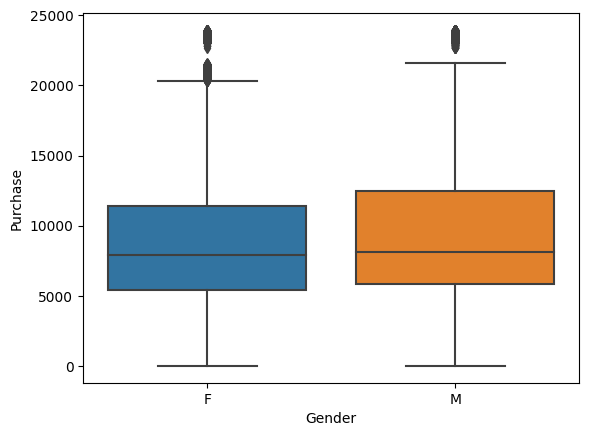

In [10]:
sns.boxplot(x="Gender",y="Purchase",data=df)

<Axes: xlabel='Purchase', ylabel='Count'>

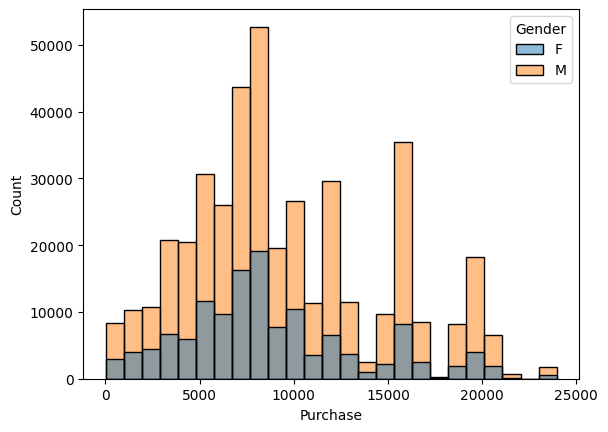

In [14]:
sns.histplot(x="Purchase",hue="Gender",data=df,bins = 25)

In [16]:
df.sample(300).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,63.0,8903.587302,4833.784918,947.0,5889.5,7945.0,11566.5,23727.0
M,237.0,9750.700422,5087.301636,26.0,6127.0,8651.0,12402.0,23265.0


In [17]:
df.sample(300).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,63.0,9537.142857,5606.190719,36.0,5393.0,8615.0,12624.0,20418.0
M,237.0,8574.928270,4951.702327,37.0,5240.0,7852.0,12025.0,20840.0


In [18]:
df.sample(300).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,84.0,8488.333333,4322.364222,1028.0,5379.25,7962.5,10046.00,23665.0
M,216.0,9684.203704,5065.922376,343.0,6033.75,8100.0,13333.75,23822.0
